# Chapter 11 Mathamatical tools

This chapter covers:
> "Approximation"

> "Convex Optimization"

> "Integration"

> "Symbolic Computation"


## Approximation

In [7]:
# Preamble
import numpy as np
from pylab import plt, mpl

# Set style, font, and e set the backend of matplotlib to the 'inline' backend
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

This section uses a function with a triganometric term and a linear term.

In [9]:
# Define our main function
def f(x):
    return np.sin(x) + 0.5 * x

In [25]:
# Helper function to create the same type of plot
def create_plot(x,y,styles,labels,axlabels,title=""):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i],y[i],styles[i],label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.title(title)
    plt.legend(loc=0)        

In [22]:
# Create the x values
x = np.linspace(-2*np.pi, 2.0*np.pi , 50.0)

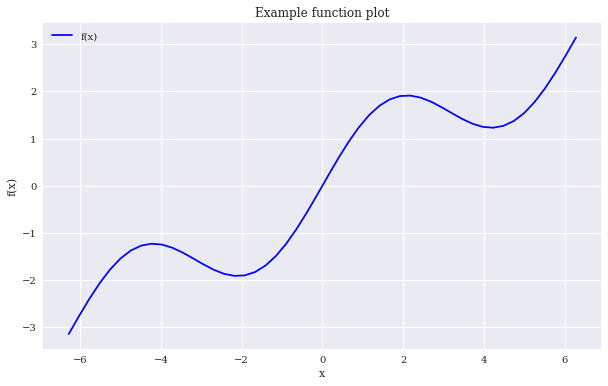

In [27]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x','f(x)'] ,
           title="Example function plot")

## Regression

## Monomials as basis functions

Parameters of polyfit() function


In [42]:
# Linear regression step
res = np.polyfit(x, f(x), deg=1, full=True)

# Full results:
# regression parameters, residuals, effective rank, singular values, relative condition number
res

(array([ 4.28841952e-01, -7.45793918e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

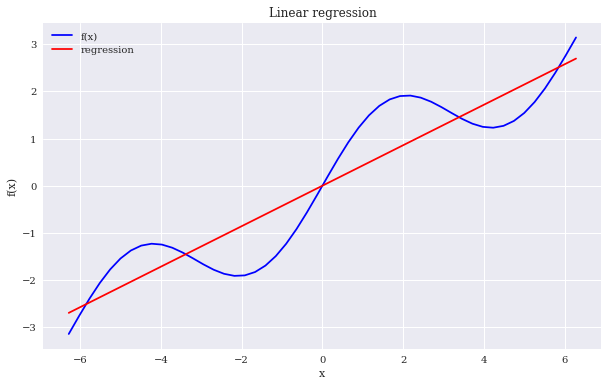

In [40]:
# Evaluate using the regression parameters
# create ndarray ry, containing y values
ry = np.polyval(res[0], x)

create_plot([x,x],
            [f(x),ry],
            ['b','r'],
            ['f(x)','regression'],
            ['x','f(x)'],
            title="Linear regression"
           )

In [51]:
# Illustarate the contents of reg
# regression parameters, residuals, effective rank, singular values, relative condition number
print("Full paramers: \n regression parameters",res[0],
      "\n residuals", res[1],
      "\n effective rank",res[2],
      "\n singular values", res[3] ,
      "\n relative condition number",res[4])

Full paramers: 
 regression parameters [ 4.28841952e-01 -7.45793918e-17] 
 residuals [21.03238686] 
 effective rank 2 
 singular values [1. 1.] 
 relative condition number 1.1102230246251565e-14


- higher order monomials, regression with monomials up to the order of 5 basis functions.

In [52]:
# fit regression monomials up to the order 5 basis functions
reg = np.polyfit(x, f(x), deg=5)

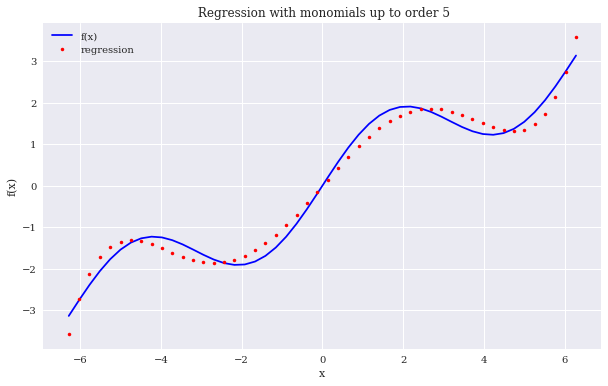

In [53]:
ry = np.polyval(reg, x)

create_plot([x, x], [f(x), ry], ['b', 'r.'],
                     ['f(x)', 'regression'], ['x', 'f(x)'],
            title= " Regression with monomials up to order 5"
           )

As we can see the regression result looks much closer to the true function. 

In [50]:
# Illustarate the contents of reg
print("Full paramers: \n regression parameters",reg[0],
      "\n residuals", reg[1],
      "\n effective rank",reg[2],
      "\n singular values", reg[3] ,
      "\n relative condition number",reg[4])

Full paramers: 
 regression parameters 0.0013792076127030744 
 residuals 0.0 
 effective rank -0.06825250718071202 
 singular values -9.145398859003949e-18 
 relative condition number 1.1142520911051494


- Regression, monomials up to order 7 to approximate the example function

In [58]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)


In [59]:
# Checks whether the function and regression values are the same or at least close.
np.allclose(f(x), ry)

False

In [60]:
# MSE for regression values given function values
np.mean((f(x) - ry) ** 2)

0.0017769134759517387

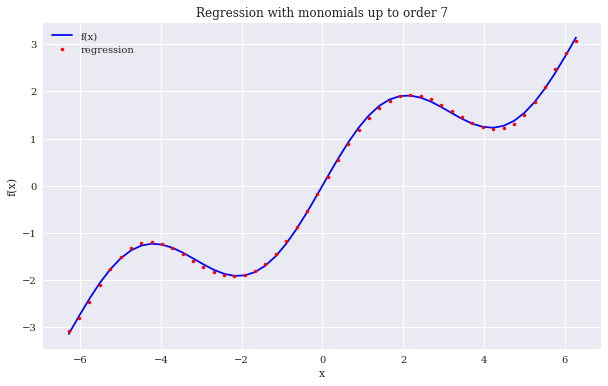

In [62]:
create_plot([x, x],
            [f(x), ry],
            ['b', 'r.'],   
            ['f(x)', 'regression'],
            ['x', 'f(x)'],
            'Regression with monomials up to order 7')

#### Individual basis functions

In [66]:
# matrix for basis function values
matrix = np.zeros((3 + 1, len(x)))

# basis function values from constant to cubic.
matrix[3, :] = x ** 3  
matrix[2, :] = x ** 2  
matrix[1, :] = x  
matrix[0, :] = 1

In [69]:
# Regression step  - central function
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
# Optimal regression parameters
reg.round(4)

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [71]:
# regression estimates for the function values.# 
ry = np.dot(reg, matrix)

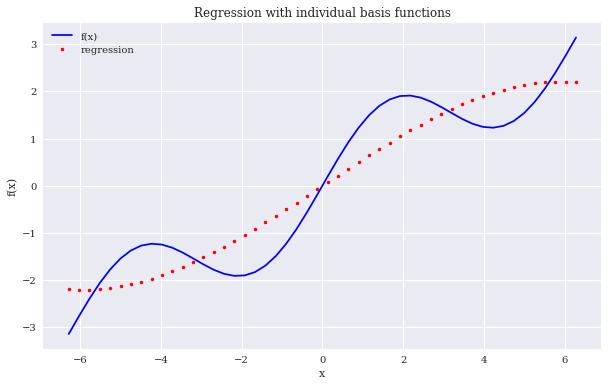

In [72]:
create_plot([x, x],
            [f(x), ry],
            ['b', 'r.'],
            ['f(x)', 'regression'],
            ['x', 'f(x)'],
           "Regression with individual basis functions" )

- Regression with the sine basis function

In [76]:
# new basis functionexploiting knowledge about the example function
matrix[3, :] = np.sin(x)

reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
# optimal regression parameters recover the original parameters
reg.round(4)

array([0. , 0.5, 0. , 1. ])

In [77]:
ry = np.dot(reg, matrix)
# regression now leads to a perfect fit
np.allclose(f(x), ry)

True

In [83]:
# MSE
print( np.mean((f(x) - ry) ** 2)
)

MSE = np.mean((f(x) - ry) ** 2)
round(MSE,4)

6.933347799794049e-33


0.0

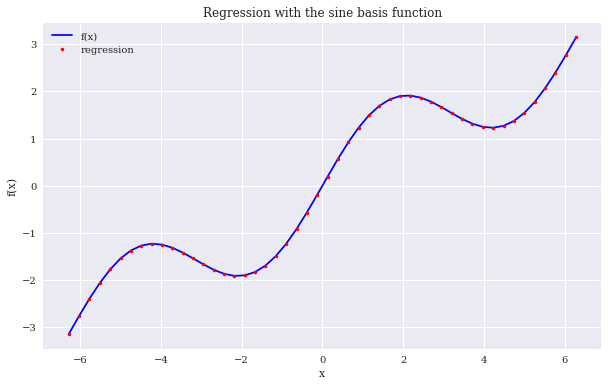

In [85]:
create_plot([x, x],
            [f(x), ry],
            ['b', 'r.'],
             ['f(x)', 'regression'],
            ['x', 'f(x)'],
           "Regression with the sine basis function")

## Noisy data
* OLS Regression works well with noisy data, as it fits the best OLS line by minimizing some cost function, the MSE.
* here we have an example to adding noise to the x-values and y-values.

In [88]:
# new determanistic x-values
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)  
# introduce noise to x values
xn = xn + 0.15 * np.random.standard_normal(len(xn))  
# intriduce noise to y values
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

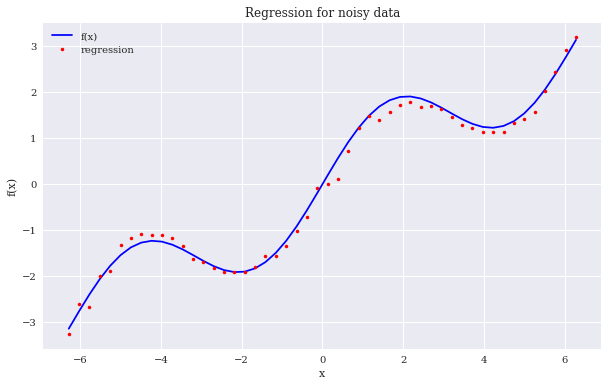

In [89]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

create_plot([x, x],
            [f(x), ry],
            ['b', 'r.'],
 ['f(x)', 'regression'],
            ['x', 'f(x)'],
"Regression for noisy data")

## Unsorted data

* Regression works well with unsorted data
* One cannot see any pattern from visual inspection of raw unsorted data
* Regression does not care of the order of the observation points as it minimizes the MSE over the whole space S.

In [90]:
# Randomize the x-values
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi  
yu = f(xu)

print(xu[:10].round(2))  
print(yu[:10].round(2))

[ 4.35  4.54  2.93 -2.44  6.12  2.8   1.27 -0.21  6.1   5.74]
[ 1.24  1.28  1.68 -1.86  2.9   1.73  1.59 -0.32  2.87  2.36]


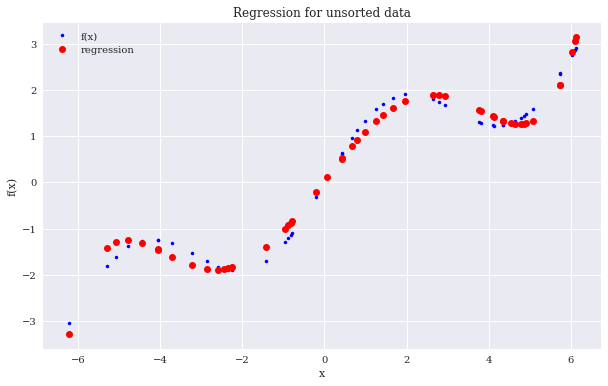

In [91]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)
create_plot([xu, xu],
            [yu, ry],
            ['b.', 'ro'],
['f(x)', 'regression'], 
            ['x', 'f(x)'],
"Regression for unsorted data")